# <u>Lab 1: Introduction to Signals</u>

In this lab you will learn 
- how to create a signal
- how to represent a message of 0s and 1s with a signal

To turn in to <a href="submit.cs.usna.edu">submit</a>:
- your version of this jupyter notebook with code filled out

    submit -c=SI486H -p=lab01 IntroLab.ipynb
  
To turn in to google classroom (<a href="https://classroom.google.com/c/ODM3Nzg4MzY5NDk0?cjc=r6qpxfgb" target="_blank">1133</a> or <a href="https://classroom.google.com/c/ODM3Nzg3MjA3NjAw?cjc=63thu5v4" target="_blank">3333</a>):
- google doc of answered questions - your answers must have justification (This is a large portion of your grade)
- GenAI transcript

## Basic Format of a Signal

A signal typically consists of the form:

$\quad s(t) = A  sin(2\pi \omega t + \phi)$

where
- $A$ is the amplitude,
- $\omega$ is the frequency of the tone (e.g. middle C on the piano is 261.6 Hz), and
- $\phi$ is the offset of the signal (known as phase)

As an example, consider

$s(t) = 5 \sin(10\pi t + \pi/2)$

Here, 
- $A = 5$, which means the wave goes all the way to 5 and -5 on the y-axis,
- frequency is $10/2 = 5$, which means there are 5 cycles per second
- and phase is $\pi/2$. The phase can be seen as the difference between the orange and blue signals

<img src="pics/sin_wave.png" alt="Sin Example" width="500">

## Creating Signals

In [1]:
# import libraries needed
import matplotlib.pyplot as plt
import numpy as np

Recall, to be able to create a signal, we need to be able to sample across a timeline at constant intervals. We use the numpy function

        np.linspace 

to do this. 

        times = np.linspace(start, end, number_samples, endpoint=True)
        
This creates an array of times that begin with "start" and ends at "end" if endpoint=True. The interval between each time returned is
        
$\Delta = \frac{(end - start)}{samples}$

The times then returned are:
        
$t_0 = start$
        
$t_1 = start + \Delta*1$

$t_i = start + \Delta*i$ for $i = 0,\ldots, number\_samples -1$

In [2]:
# example:
np.linspace(0,1,10,endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Create a function, create_signal, that outputs times and a signal with input parameters:
- A 
- freq
- phi
- sampling_rate 
- duration

where
$signal = A  \sin(2\pi \omega t + \phi)$

and $times =$ [second increments array]


In [3]:
# Your Code Here
def create_signal(A,w,phi,t):
    return A*np.sin(2*np.pi*w*t + phi)

To ensure your function is correct, create two signals with the following parameters:
- amplitude: 5
- phase offset: 0 (for the first) and $pi$/2 (for the second)
- sample rate: 100 samples per second
- duration: 1 second
- frequency: 5 Hz

Once you have created your signal, plot both on the same graph and label. Your goal is to achieve the same plot as above (at the very beginning).

In [4]:
# YOUR CODE HERE: create the signals
signal1 = []
signal2 = []

times = np.linspace(0,1,30,endpoint=False)
for time in times:
    signal1.append(create_signal(5,5,0,time))
    signal2.append(create_signal(5,5,np.pi/2,time))



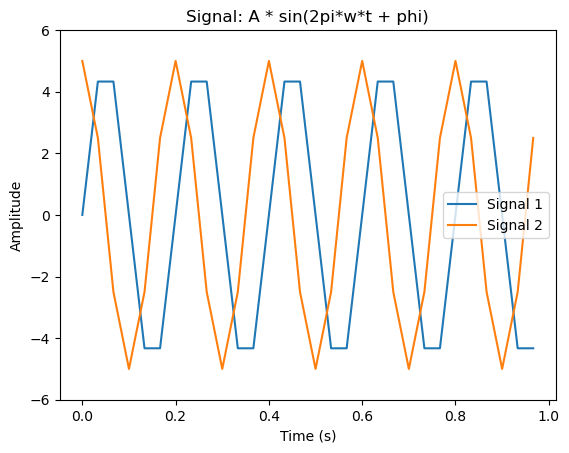

In [5]:
# YOUR CODE HERE: plot the signals
plt.plot(times, signal1, label="Signal 1")
plt.plot(times, signal2, label="Signal 2")
plt.legend()
plt.ylim(-6,6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal: A * sin(2pi*w*t + phi)")
plt.show()

Once you have obtained the correct plot above (one that matches the given picture at the top), plot only the samples of the signal with a phase offset. Make sure you label the x-axis, y-axis and provide a title


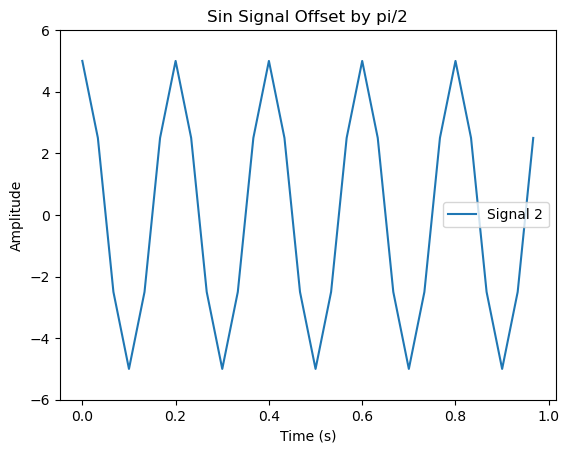

In [6]:
# YOUR CODE HERE
plt.plot(times, signal2, label="Signal 2")
plt.legend()
plt.ylim(-6,6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sin Signal Offset by pi/2")
plt.show()

<b> QUESTIONS: </b> (Put the answers in a google doc with justification.)
* What happens if we play around with the sampling_rate?
* How low can you go before the signal looks weird and does not look like a wave?
* Does it matter how high you go?

Suggestion: Take snapshots of your pictures as you explore these questions and back up each of your answers with your data. 

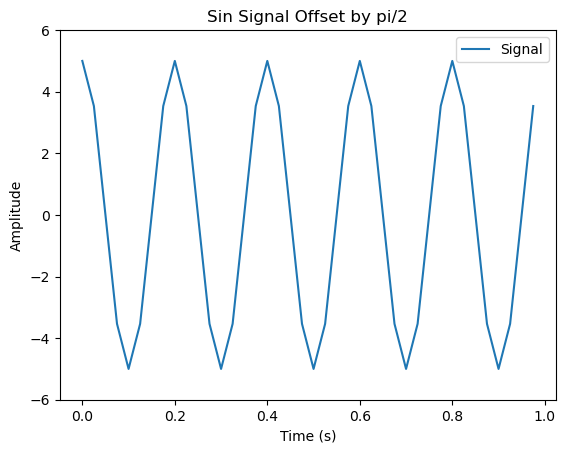

In [7]:
#YOUR CODE HERE to help you answer the above questions
# YOUR CODE HERE: create the signals
signal = []


times = np.linspace(0,1,40,endpoint=False)
for time in times:
    signal.append(create_signal(5,5,np.pi/2,time))

plt.plot(times, signal, label="Signal")
plt.legend()
plt.ylim(-6,6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sin Signal Offset by pi/2")
plt.show()

## Chirps

To help with determining the resilience and range of a communications system (and radar systems), chirps are used. A chirp is a signal that goes up in frequency or goes down in frequency as time progresses. Typically, they are very short and increase in frequency really fast. For example, every 100th of a second, the signal would increase in frequency by 10.

To start off with, we are going to create a chirp that increases in frequency by 1 Hz every second.

In [8]:
A = 5
phi = 0
sampling_rate = 100  #samples per second
duration      = 1 #sec per frequency
seconds       = 5 #sec
freq          = 1 #cycles per sec

# YOUR CODE HERE: 
# Goal: create a signal that starts at a frequency of 1Hz and increases by 1 each second and has a duration of 5 seconds
signal = []

times = np.linspace(0,5,sampling_rate,endpoint=False)

for time in times:
    freq = 1 + int(time)
    signal.append(create_signal(A=A,w=freq,phi=phi,t=time))

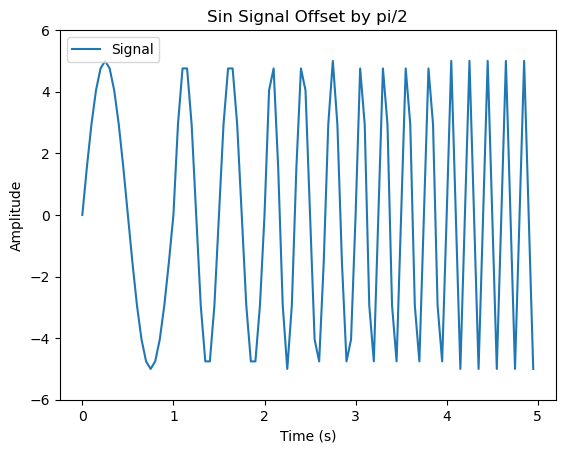

In [9]:
# plot the signal with time along the x-axis and amplitude on the y-axis
# YOUR CODE HERE:
plt.plot(times, signal, label="Signal")
plt.legend()
plt.ylim(-6,6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sin Signal Offset by pi/2")
plt.show()

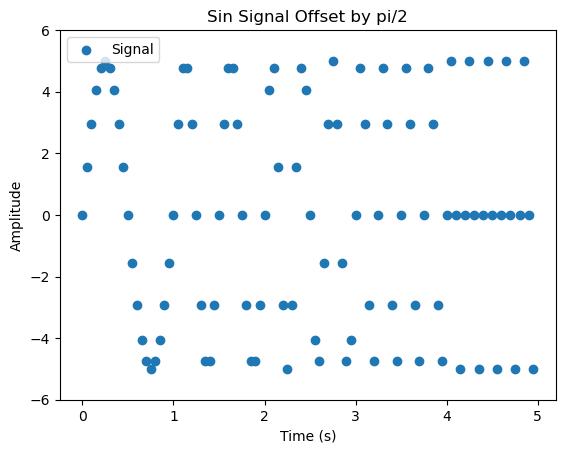

In [10]:
# plot the signal using a scatter plot with time along the x-axis and amplitude on the y-axis
# YOUR CODE HERE:
plt.scatter(times, signal, label="Signal")
plt.legend()
plt.ylim(-6,6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sin Signal Offset by pi/2")
plt.show()

To assist us in seeing the frequency change with more clarity, it is helpful to change the y-axis to frequencies. This type of graph (where the x-axis is time and y-axis is frequency) is called a <b><i>spectogram</i></b>.

The code below shows how one can plot the spectogram given a signal and sampling rate. (<i>Note:</i> depending on your variable names, you may have to change the code)

/tmp/ipykernel_983217/2996010847.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=100).
  _,_, _, _= plt.specgram(signal, NFFT=sampling_rate*2, Fs=sampling_rate, noverlap=10, cmap='viridis')


(0.0, 50.0)

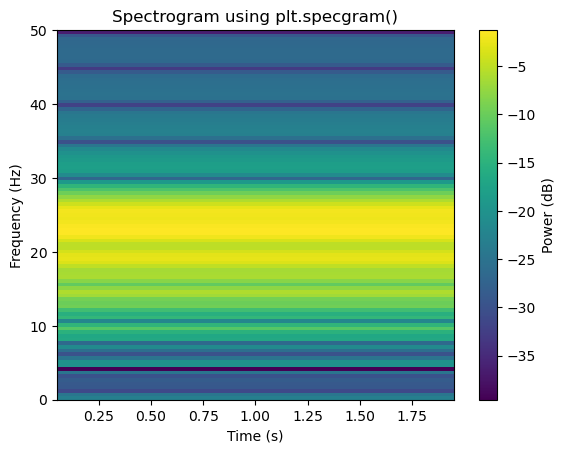

In [11]:
# to plot the signal where frequencies is the y-axis and time is the axis, we use a spectogram. We will go into this in more detail later.
plt.figure()
_,_, _, _= plt.specgram(signal, NFFT=sampling_rate*2, Fs=sampling_rate, noverlap=10, cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title('Spectrogram using plt.specgram()')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, sampling_rate/2) # Show only up to the Nyquist frequency

### Why is this type of signal called a chirp? 
You may be wondering why this type of signal is called a chirp. To understand this, we will need to create a chirp that is in the auditory range and has a sampling rate that our speakers expect. 

For example,

    frequency = 1600  # Hz
    
    sampling_rate = 44100  # samples per second

In [12]:
# create a new signal that starts at 1600 and goes up 10 Hz every .05 of a second and use sample rate 44100
A = 1
sampling_rate = 44100  #samples per second
duration      = .1 #sec per frequency before change
freq          = 1600 #cycles per sec
num           = 20

# YOUR CODE HERE: create a signal with the above parameters but where the frequency increases 10 Hz every .05 seconds
signal = []

times = np.linspace(0,5,sampling_rate,endpoint=False)

for time in times:
    if time % 0.05 == 0.0:
        freq += 10
    signal.append(create_signal(A=A,w=freq,phi=phi,t=time))

/tmp/ipykernel_983217/337546478.py:3: UserWarning: Only one segment is calculated since parameter NFFT (=88200) >= signal length (=44100).
  _,_, _, _= plt.specgram(signal, NFFT=sampling_rate*2, Fs=sampling_rate, noverlap=10, cmap='viridis')


(0.0, 22050.0)

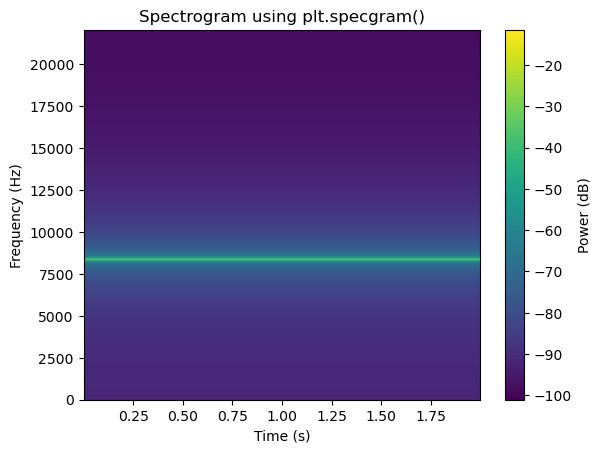

In [13]:
# YOUR CODE HERE: copy the spectogram code from above and change it appropriately in order to view your chirp
plt.figure()
_,_, _, _= plt.specgram(signal, NFFT=sampling_rate*2, Fs=sampling_rate, noverlap=10, cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title('Spectrogram using plt.specgram()')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, sampling_rate/2) # Show only up to the Nyquist frequency

Now lets listen to the sound

Depending on your environment, you will have to either do a pip install sounddevice or conda install conda-forge::python-sounddevice

In [14]:
import sounddevice as sd
def play_raw_data(raw_data, sample_rate):

    sd.play(raw_data, sample_rate)
        
    # 5. Wait for playback to finish (important, or the script will quit early)
    sd.wait()
    print("Playback finished.")

play_raw_data(signal, sampling_rate)

Playback finished.


## Combining Signals

<b>Questions: </b>
For the questions below, have examples of code and signals that proves your answer. (Put the answers in a google doc with justification.)

- What happens when you add a signal with same frequency and phase? 

    Answer:

- What if it is slightly off from the other one?
    
    Answer:

- Col. Timothy Holtan, retired US Army Field Band Director, states "Power through precision, not volume" on a regular basis to his wind players. Explain why Col. Holtan says this? 

    Answer:

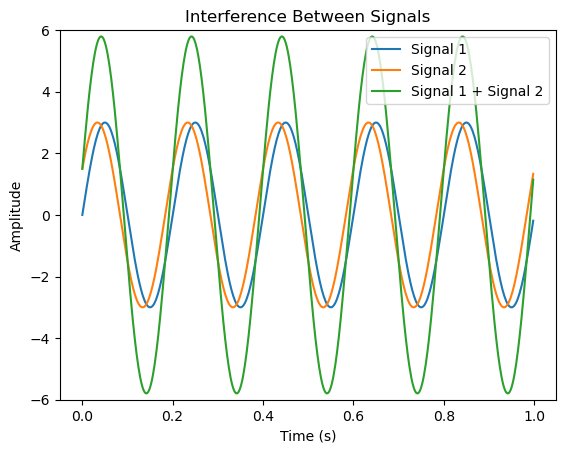

In [15]:
#YOUR CODE HERE to help you answer the above questions
signal1 = []
signal2 = []
signal3 = []
times = np.linspace(0,1,500,endpoint=False)

offset = np.pi/6

for time in times:
    signal1.append(create_signal(3,5,0,time))
    signal2.append(create_signal(3,5,offset,time))
    signal3.append(create_signal(3,5,0,time) + create_signal(3,5,offset,time))
plt.plot(times, signal1, label="Signal 1")
plt.plot(times, signal2, label="Signal 2")
plt.plot(times, signal3, label="Signal 1 + Signal 2")
plt.legend()
plt.ylim(-6,6)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Interference Between Signals")
plt.show()

## 0/1 Representation in Signals

A question of constant research is how to represent a message of 0s and 1s using a signal. Two famous ways are AM and FM.

### AM (Amplitude Modulation):
- AM uses different amplitudes to represent 0/1

(-6.0, 6.0)

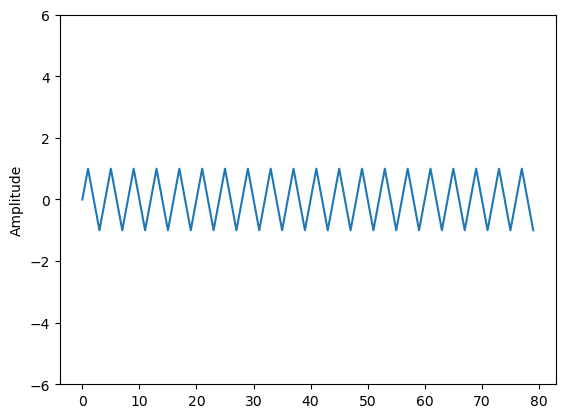

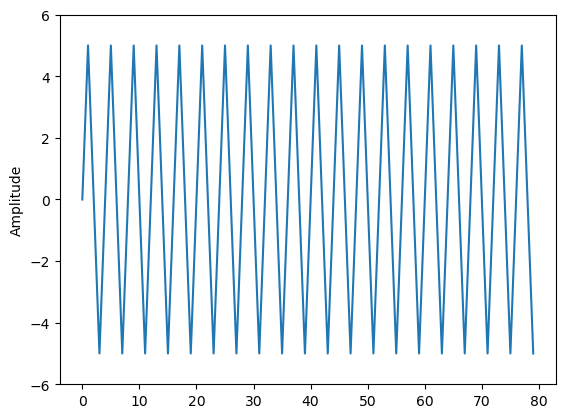

In [20]:
#write a function AM_bit that takes in as input a frequency, sampling rate, and a bit value.
#the output of the function should be the signal which has the amplitude of 1 if bit is a 0; 5 if bit is a 1

def AM_bit(bit, freq=100, sampling_rate=1000):
    # YOUR CODE HERE:
    
    signal = []

    times = np.linspace(0,1,sampling_rate,endpoint=False)

    for time in times:
        if bit == 0:
            signal.append(create_signal(1, freq, 0, time))
        else:
            signal.append(create_signal(5, freq, 0, time))
    return signal
    

#debug
plt.plot(AM_bit(0, freq=20, sampling_rate=80));
plt.ylabel("Amplitude")
plt.ylim(-6, 6)
plt.figure(); 
plt.plot(AM_bit(1, freq=20, sampling_rate=80))
plt.ylabel("Amplitude")
plt.ylim(-6, 6)

In [21]:
'''
class notes: how sound is moved from a microphone to across the radio waves
freq of am radio and human voice message:
wc = 1000KHz
wm = 20Hz-5KHz

human talks into microphone, bellows in microphone outputs a signal on the wire btwn 20Hz-5KHz m(t)

frequency doesnt change
amplitude changes to indicate change in sound

C(t) = A cos(2*pi*w*t + phi)
w = 1000 KHz

s(t) = [1 + m(t)] * cos(2*pi*1000KHz+t)
'''


# create a function AM that takes in a list of bits (representing a message), 
# and using the function AM_bit,have your function AM output a signal that has an amplitude of 1 for everytime 
# a bit is 0 and 5 for every time a bit is 1
def AM(message, freq, sampling_rate):
    signal = []
    # message length = sampling rate * len(message)
    mtime = sampling_rate * len(message)
    print(f"there are  {len(message)} bits in message")
    # generate times
    times = np.linspace(0,mtime,sampling_rate,endpoint=False)
    print(f"there are {len(times)} times in times")

    # create signal based on bits in msg
    mctr = 0
    for time in times:
        if message[mctr] == 0:
            signal.append(create_signal(1, freq, 0, time))
        else:
            signal.append(create_signal(5, freq, 0, time))
        mctr += 1
    return signal

    
        
# debug
message = [1,1,1,0,0,1,0,1]
freq = 20
sampling_rate = 80
times = np.linspace(0.0, len(message), len(message)*sampling_rate, endpoint=False)
plt.plot(times, AM(message, freq, sampling_rate))
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")

there are  8 bits in message
there are 80 times in times


IndexError: list index out of range

### FM (Frequency Modulation):
- FM uses different frequencies to represent 0/1

In [ ]:
#write a function FM_bit that takes in as input a sampling rate, and a bit value.
#the output of the function should be the signal which has a continuous amplitude of 1 and freq of 20 when bit is a 0; of 40 if bit is a 1

def FM_bit(bit, sampling_rate=1000):
    # YOUR CODE HERE
    pass


    
#debug
plt.plot(FM_bit(0, sampling_rate=160));
plt.figure(); plt.plot(FM_bit(1, sampling_rate=160))

In [ ]:
# create a function FM that takes in a list of bits (representing a message), 
# and using the function FM_bit,have your function FM output a signal that has a frequency of 40 for everytime 
# a bit is 0 and 80 for every time a bit is 1
def FM(message, sampling_rate):
    # YOUR CODE HERE
    pass


    
# debug
message = [1,1,1,0,0,1,0,1]
sampling_rate = 160
times   = np.linspace(0.0, len(message), len(message)*sampling_rate, endpoint=False)
s = FM(message, sampling_rate)
plt.plot(times, s)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure()
_,_, _, _= plt.specgram(s, NFFT=160, Fs=sampling_rate, noverlap=128, cmap='viridis')
plt.colorbar(label='Power (dB)')
plt.title('Spectrogram using plt.specgram()')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, sampling_rate/2) # Show only up to the Nyquist frequency
plt.show()

<b> Question: </b> (Put the answers in a google doc.)

What other ways can you think of to represent 0s and 1s with signals?

In [ ]:
#YOUR CODE HERE to help you answer the above questions
